In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
# Load the CSV
df = pd.read_csv('/content/avocado_ripeness_dataset.csv')

# printing first 30 rows
print(df.head(30))



    firmness  hue  saturation  brightness color_category  sound_db  weight_g  \
0       14.5   19          40          26          black        34       175   
1       71.7   53          69          75          green        69       206   
2       88.5   60          94          46     dark green        79       220   
3       93.8  105          87          41     dark green        75       299   
4       42.5  303          58          32         purple        63       200   
5       13.6    2          51          11          black        34       173   
6       52.3  277          75          57         purple        61       187   
7       88.1   91          93          48     dark green        73       281   
8       85.2  116          89          67     dark green        77       220   
9       67.3   77          79          78          green        66       232   
10      47.5  279          65          37         purple        62       203   
11      45.4  299          60          5

In [ ]:

print(df.head())
print(df.info())
print(df.shape)

   firmness  hue  saturation  brightness color_category  sound_db  weight_g  \
0      14.5   19          40          26          black        34       175   
1      71.7   53          69          75          green        69       206   
2      88.5   60          94          46     dark green        79       220   
3      93.8  105          87          41     dark green        75       299   
4      42.5  303          58          32         purple        63       200   

   size_cm3         ripeness  
0       261             ripe  
1       185  pre-conditioned  
2       143             hard  
3       140             hard  
4       227         breaking  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   firmness        250 non-null    float64
 1   hue             250 non-null    int64  
 2   saturation      250 non-null    int64  
 3   brigh

In [ ]:
print(df.describe())
print(df.describe(include='object'))


         firmness        hue  saturation  brightness    sound_db    weight_g  \
count  250.000000  250.00000  250.000000   250.00000  250.000000  250.000000   
mean    50.618400  125.94400   64.356000    45.07200   58.016000  220.188000   
std     27.277678  117.13767   17.377144    19.11629   13.838126   34.405225   
min     10.300000    1.00000   30.000000    10.00000   30.000000  152.000000   
25%     25.750000   25.25000   51.250000    31.00000   47.250000  193.250000   
50%     48.950000   77.00000   65.000000    46.00000   60.000000  220.000000   
75%     74.050000  278.75000   76.750000    58.00000   68.000000  245.000000   
max     98.800000  329.00000   99.000000    78.00000   79.000000  299.000000   

         size_cm3  
count  250.000000  
mean   208.644000  
std     55.940564  
min    100.000000  
25%    155.250000  
50%    218.000000  
75%    260.500000  
max    299.000000  
       color_category ripeness
count             250      250
unique              4        5
top   

firmness          0
hue               0
saturation        0
brightness        0
color_category    0
sound_db          0
weight_g          0
size_cm3          0
ripeness          0
dtype: int64


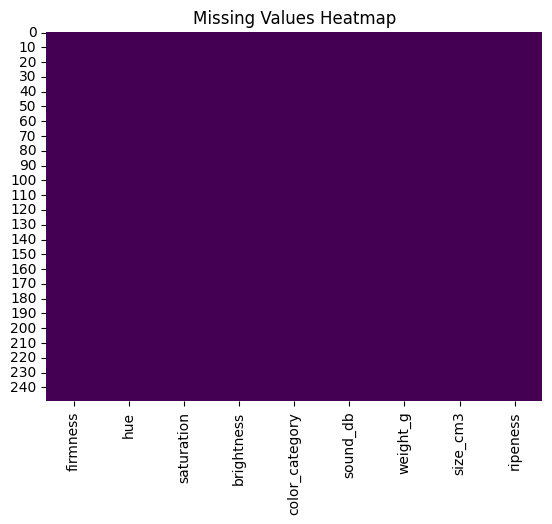

In [ ]:
#Missing Values Info
print(df.isnull().sum())
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()


ripeness
ripe               50
pre-conditioned    50
hard               50
breaking           50
firm-ripe          50
Name: count, dtype: int64


/tmp/ipython-input-5-1773918530.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='ripeness', data=df, palette='Set2')


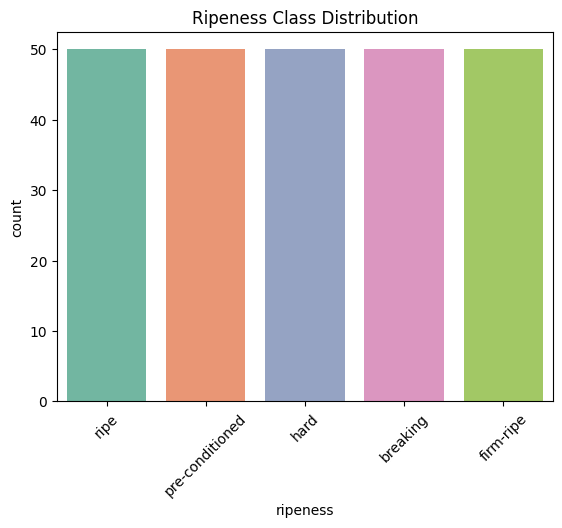

In [ ]:
#Classwise ripeness Distribution
print(df['ripeness'].value_counts())
sns.countplot(x='ripeness', data=df, palette='Set2')
plt.title("Ripeness Class Distribution")
plt.xticks(rotation=45)
plt.show()


/tmp/ipython-input-6-4135361866.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='color_category', data=df, palette='Set3')


color_category
black         75
purple        75
green         50
dark green    50
Name: count, dtype: int64


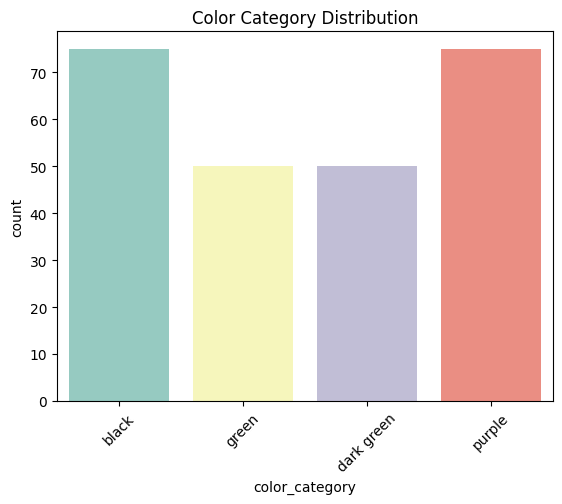

In [ ]:
#Color Distribution Visualization
print(df['color_category'].value_counts())
sns.countplot(x='color_category', data=df, palette='Set3')
plt.title("Color Category Distribution")
plt.xticks(rotation=45)
plt.show()


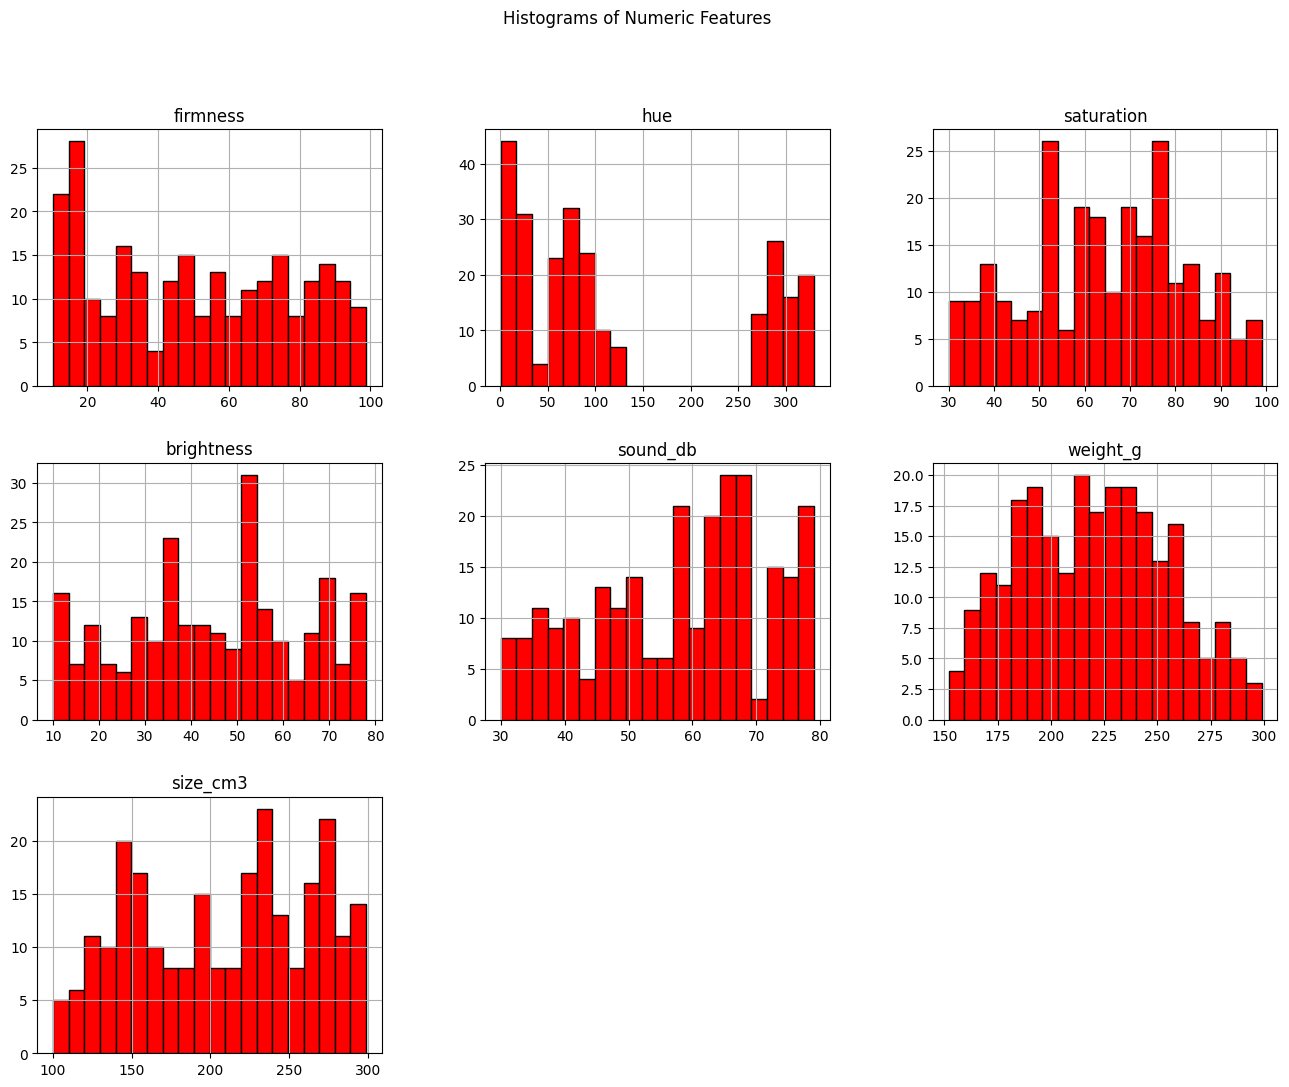

In [ ]:

num_cols = ['firmness', 'hue', 'saturation', 'brightness', 'sound_db', 'weight_g', 'size_cm3']

df[num_cols].hist(bins=20, figsize=(16, 12), color='red', edgecolor='black')
plt.suptitle("Histograms of Numeric Features")
plt.show()


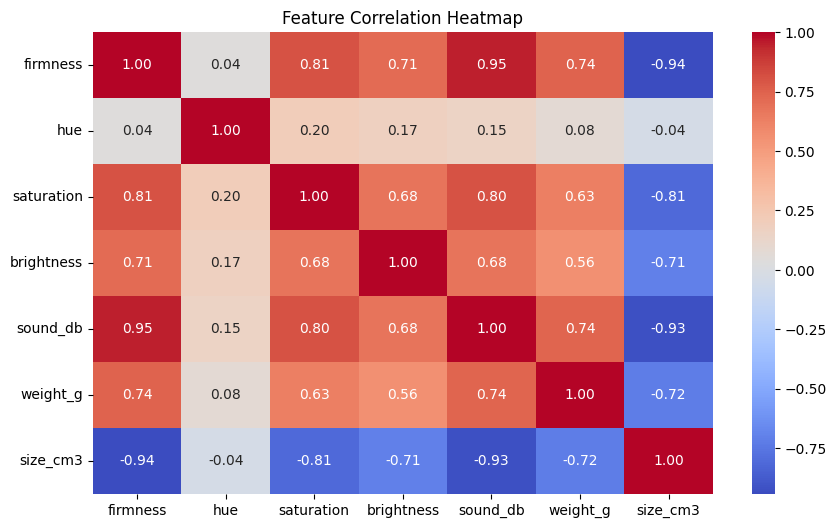

In [ ]:
#Correlation Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


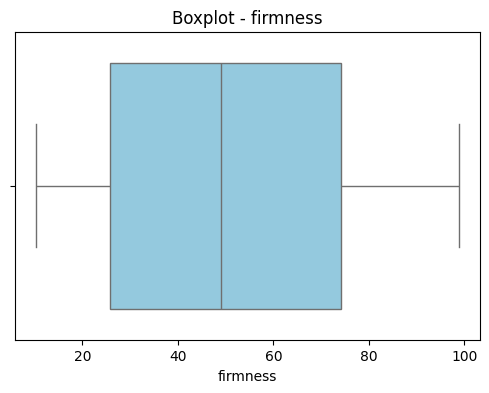

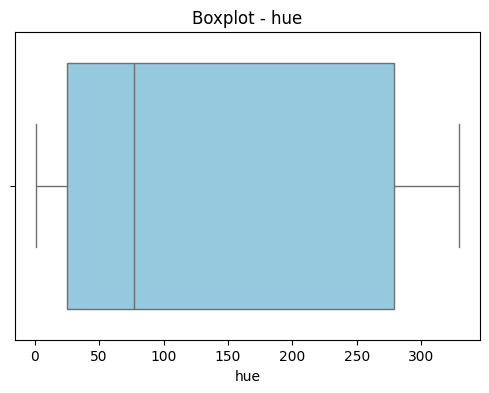

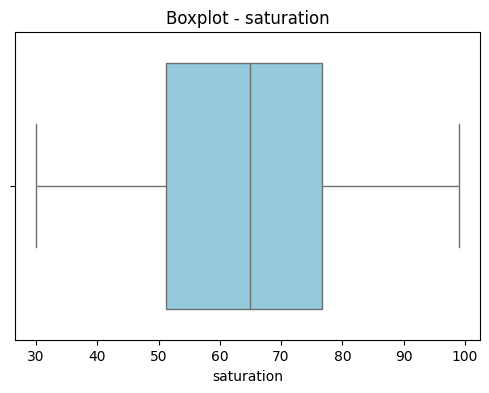

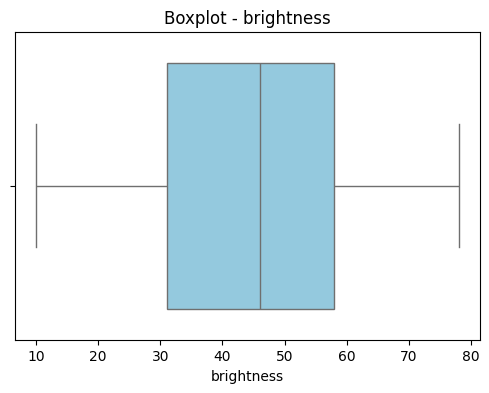

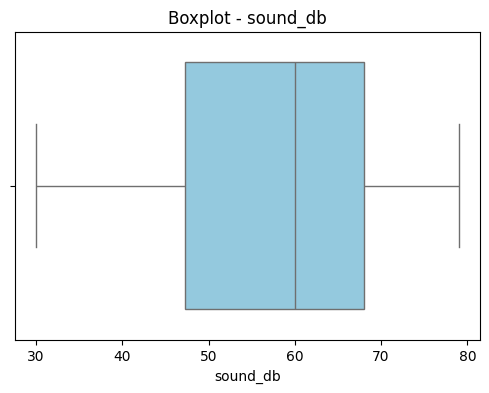

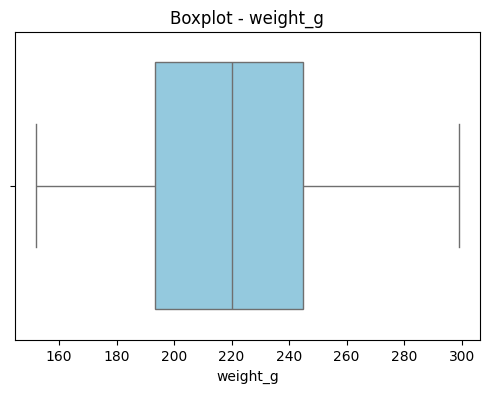

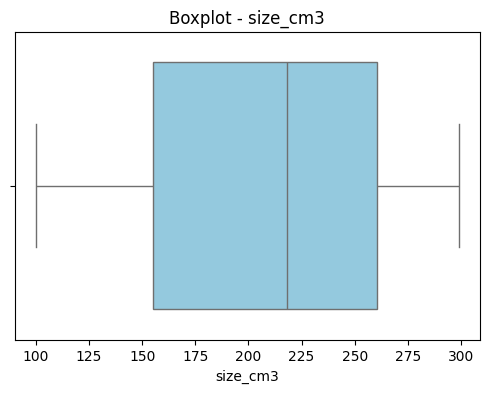

In [ ]:
#Outlier Visualizer
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f"Boxplot - {col}")
    plt.show()


In [ ]:
#Outlier Detection Manually
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

outliers = ((df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR))).sum()
print("Outliers per column:\n", outliers)

Outliers per column:
 firmness      0
hue           0
saturation    0
brightness    0
sound_db      0
weight_g      0
size_cm3      0
dtype: int64


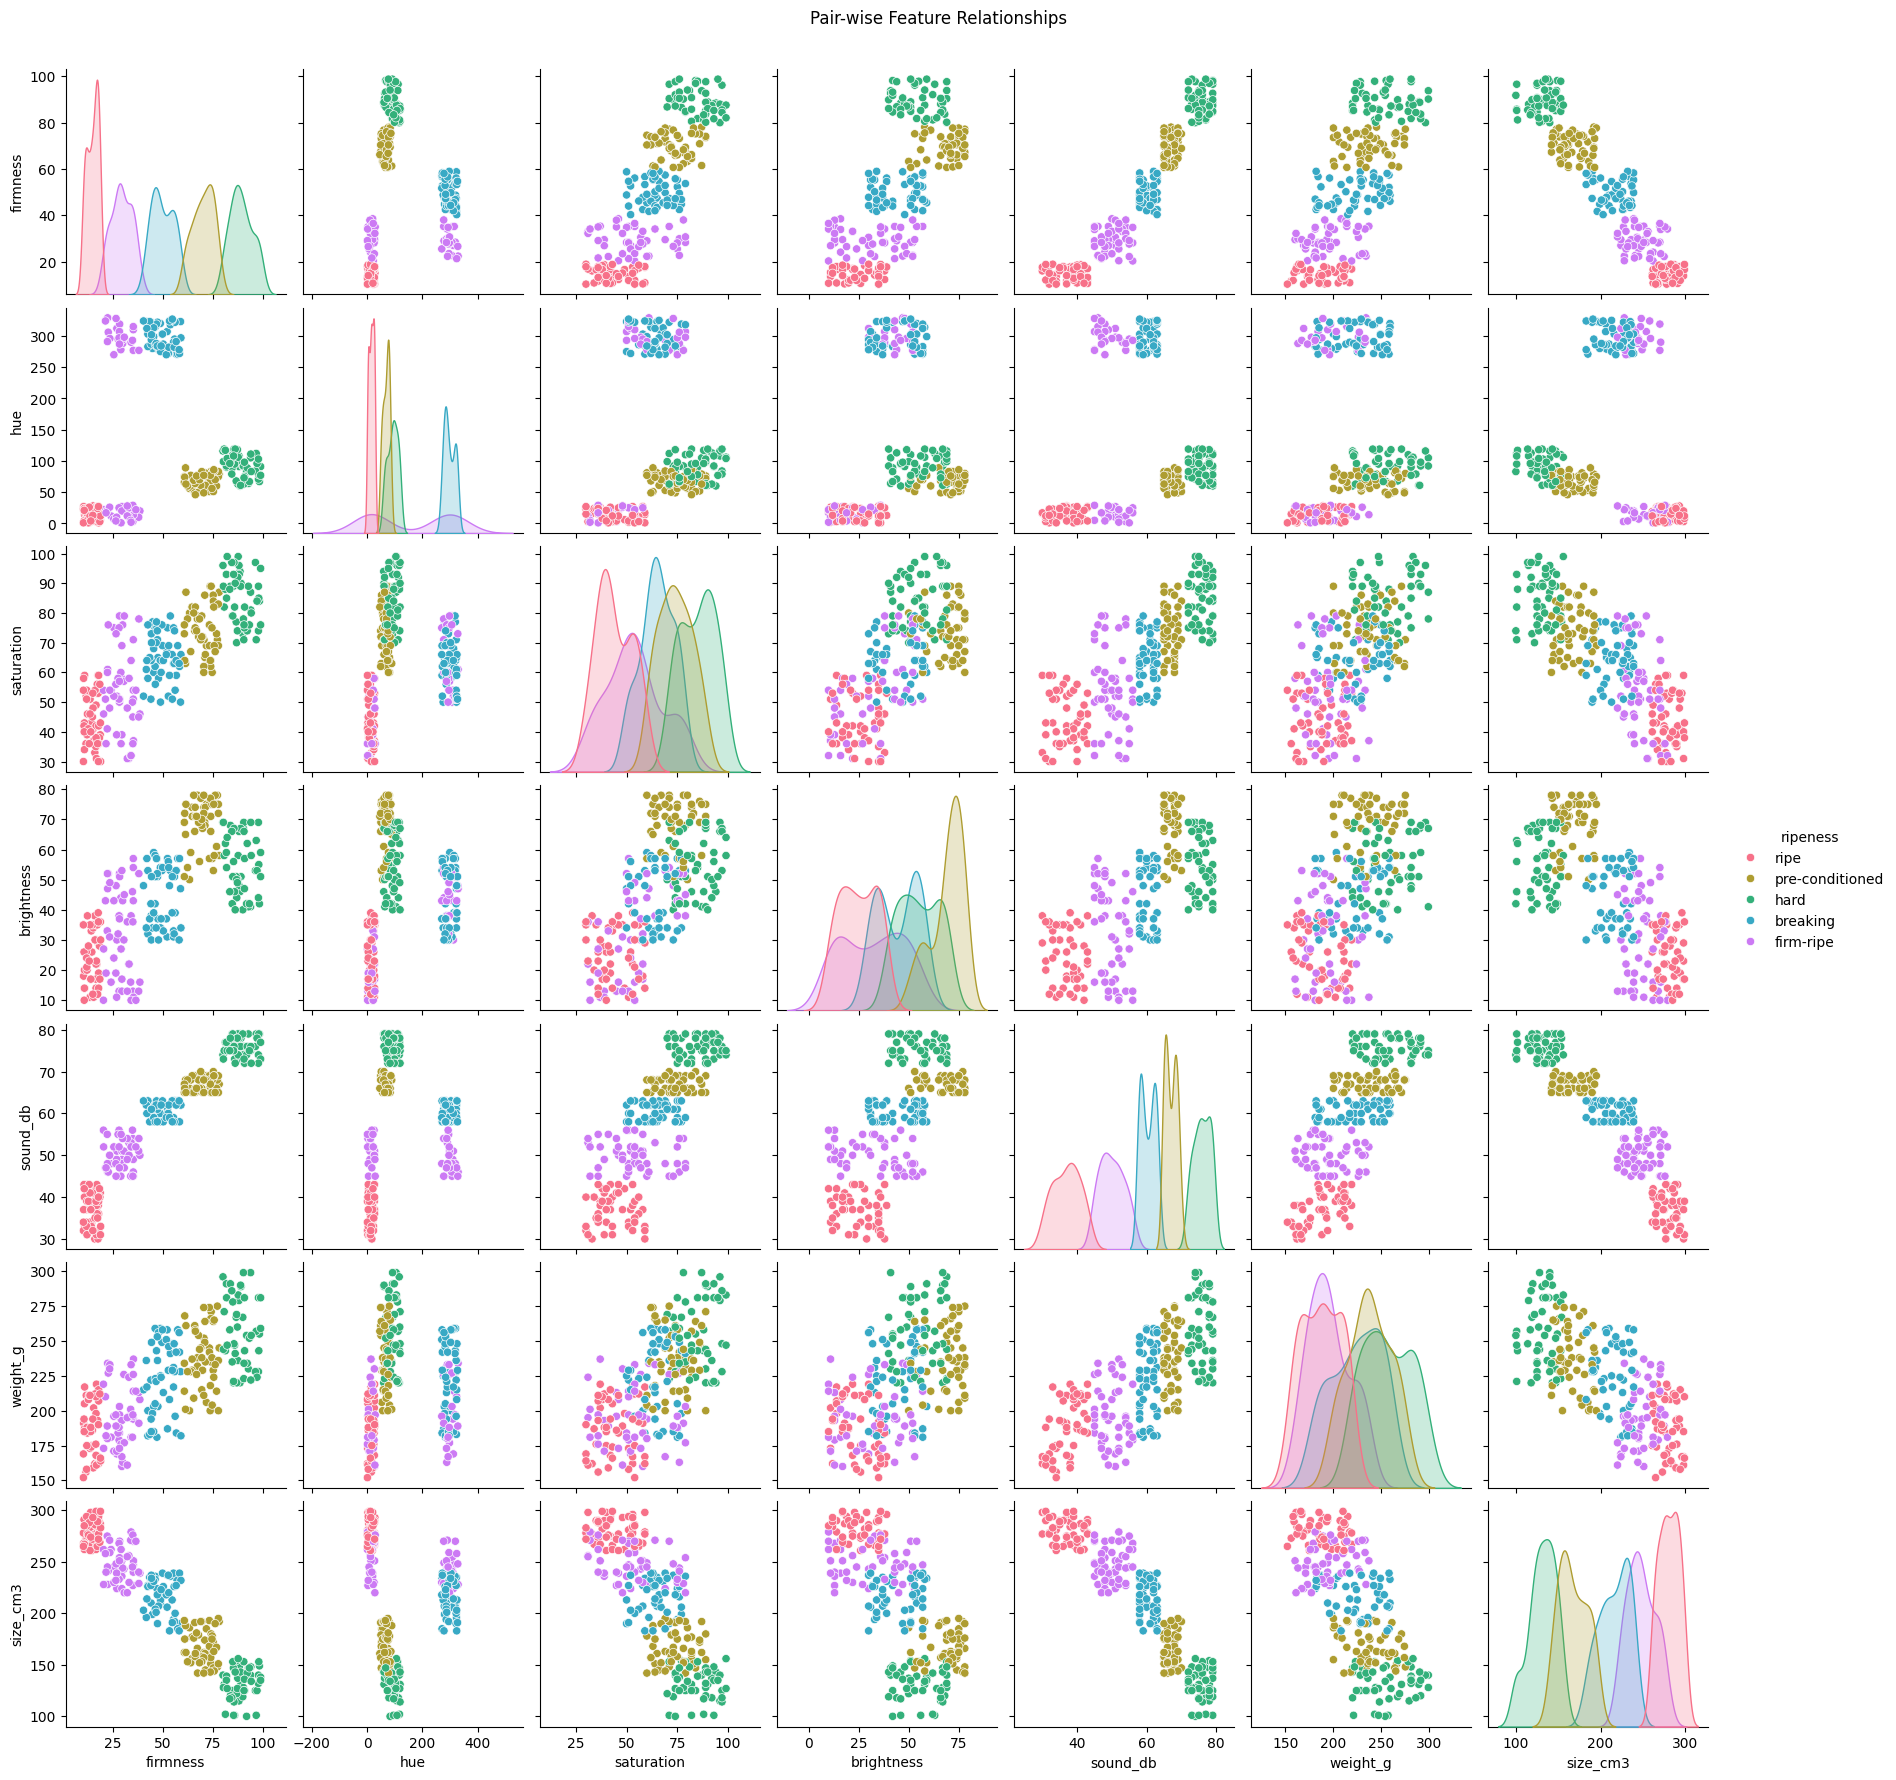

In [ ]:
#PairPlot
sns.pairplot(df, hue='ripeness', palette='husl', diag_kind='kde')
plt.suptitle("Pair-wise Feature Relationships", y=1.02)
plt.show()

                 firmness     hue  saturation  brightness  sound_db  weight_g  \
ripeness                                                                        
breaking           49.806  297.22       65.02       44.62     60.36    223.72   
firm-ripe          29.324  157.50       53.72       31.90     49.98    195.54   
hard               89.088   91.76       85.04       55.08     75.88    256.80   
pre-conditioned    70.022   68.40       73.98       69.04     66.98    237.50   
ripe               14.852   14.84       44.02       24.72     36.88    187.38   

                 size_cm3  
ripeness                   
breaking           216.16  
firm-ripe          247.78  
hard               131.54  
pre-conditioned    167.26  
ripe               280.48  


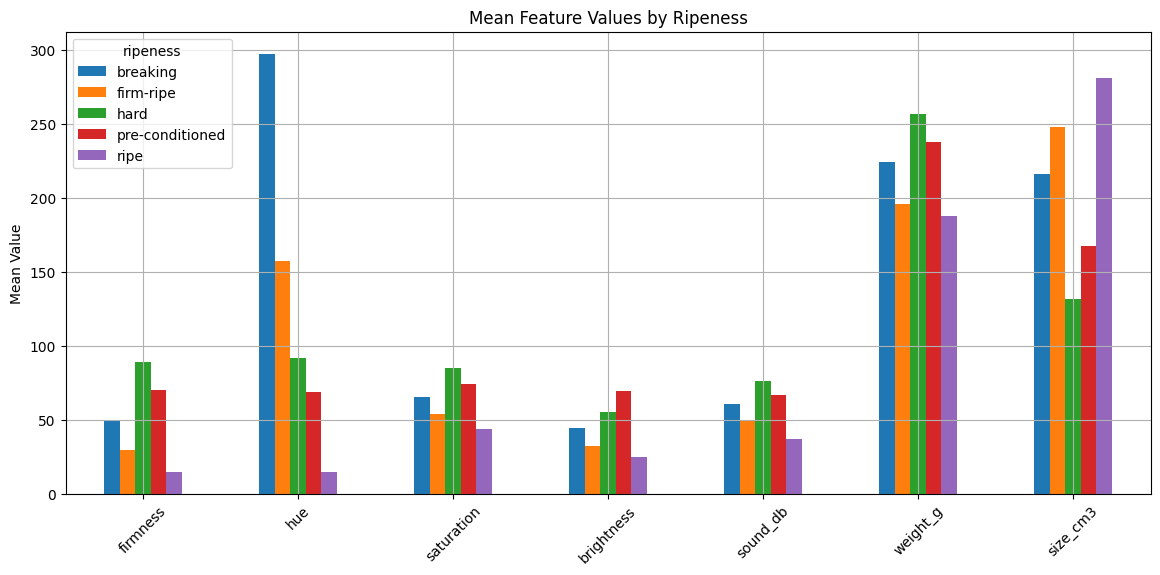

In [ ]:
group_means = df.groupby('ripeness')[num_cols].mean()
print(group_means)

group_means.T.plot(kind='bar', figsize=(14, 6))
plt.title("Mean Feature Values by Ripeness")
plt.ylabel("Mean Value")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [ ]:
#Separate input features (X) and target variable (y)
X = df.drop('ripeness', axis=1)
y = df['ripeness']

In [ ]:
#Separate column types
num_col = ['firmness', 'hue', 'saturation', 'brightness', 'sound_db', 'weight_g', 'size_cm3']
cat_col = ['color_category']

In [ ]:
#Preprocess Numerical Columns
scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(X[num_col])


In [ ]:
#Label Encode Categorical Column instead of One-Hot
label_encoder = LabelEncoder()
X_cat_encoded = label_encoder.fit_transform(X['color_category'])
X_cat_encoded = X_cat_encoded.reshape(-1, 1)  # Reshape to 2D for concatenation



In [ ]:
joblib.dump(scaler, 'scaler.joblib')
joblib.dump(label_encoder, 'color_encoder.joblib')
joblib.dump(le, 'ripeness_encoder.joblib')

['ripeness_encoder.joblib']

In [ ]:
#Combine numerical and encoded categorical features
X_data = np.hstack((X_num_scaled, X_cat_encoded))

In [ ]:
#Encode target labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
#Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X_data, y, test_size=0.2, random_state=42)

In [ ]:
#Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
# Predict
y_pred_rf = rf_model.predict(X_test)

# Evaluate
print("📌 Random Forest Performance:")
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

📌 Random Forest Performance:
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00        13

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

Confusion Matrix:
 [[13  0  0  0  0]
 [ 0  9  0  0  0]
 [ 0  0  8  0  0]
 [ 0  0  0  7  0]
 [ 0  0  0  0 13]]


In [ ]:
#Train SVM Classifier
from sklearn.svm import SVC
svc_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svc_model.fit(X_train, y_train)
# Predict
y_pred_svc = svc_model.predict(X_test)

# Evaluate
print("SVC (Support Vector Classifier) Performance:")
print("Classification Report:\n", classification_report(y_test, y_pred_svc))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svc))

SVC (Support Vector Classifier) Performance:
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00        13

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

Confusion Matrix:
 [[13  0  0  0  0]
 [ 0  9  0  0  0]
 [ 0  0  8  0  0]
 [ 0  0  0  7  0]
 [ 0  0  0  0 13]]


In [ ]:
#Training Logistic Regressor
from sklearn.linear_model import LogisticRegression
lg_model = LogisticRegression(max_iter=1000, random_state=42)
lg_model.fit(X_train, y_train)
# Predict
y_pred_lg = lg_model.predict(X_test)

# Evaluate
print("Logistic Regression Performance:")
print("Classification Report:\n", classification_report(y_test, y_pred_lg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lg))

Logistic Regression Performance:
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00        13

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

Confusion Matrix:
 [[13  0  0  0  0]
 [ 0  9  0  0  0]
 [ 0  0  8  0  0]
 [ 0  0  0  7  0]
 [ 0  0  0  0 13]]


In [ ]:
#Training XGBoost Classifier
from xgboost import XGBClassifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)
# Predict
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate
print("XGBoost Classifier Performance:")
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))

XGBoost Classifier Performance:
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00        13

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

Confusion Matrix:
 [[13  0  0  0  0]
 [ 0  9  0  0  0]
 [ 0  0  8  0  0]
 [ 0  0  0  7  0]
 [ 0  0  0  0 13]]


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:21:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
import joblib

# Save the model to a file
joblib.dump(rf_model, 'avocado_ripeness_model.joblib')

['avocado_ripeness_model.joblib']

In [ ]:
print(dict(zip(le.classes_, le.transform(le.classes_))))

{'breaking': np.int64(0), 'firm-ripe': np.int64(1), 'hard': np.int64(2), 'pre-conditioned': np.int64(3), 'ripe': np.int64(4)}
